### Time Series Analysis

**Reverse Classroom Group 8**

Michael Ojeranti,
Maria Elizathe


---


# What is time series analysis?


---


Time series analysis is a specific way of analyzing a sequence of data points collected over an interval of time.

Analysts record data points at consistent intervals over a set period of time rather than just recording the data points intermittently or randomly. This type of analysis is crucial to show how variables change over time.

Time series analysis typically requires a large number of data points to ensure consistency and reliability. This also ensures that you have a representative sample size and that analysis can cut through noisy data.

Additionally, this method can be used for forecasting or predicting future data based on historical data.



---






# Time Series Analysis Examples

This method of data mining can be used for non-stationary data that is constantly fluctuating over time or is affected by time. Some examples of time series analysis in use include:



*   Weather Data
*   Rainfall Measurments
*   Temperature Reading
*   Heart rate monitoing (EKG)
*   Brain monitoring (EEG)
*   Quarterly sales
*   Stock prices
*   Automated stock trading



---



# Data Classification
Time series data can be further classified into two main categories:


*   **Stock Time Series Data**: Measures attributes at a certain point in time, like a static snapshot of the information as it was
*   **Flow time series data**: Measures the activity of the attributes over a certain period, which is generally part of the total whole and makes up a portion of the results.


---





# Types of Time Series Analysis

Models of time series analysis include:

**Classification**: Identifies and assigns categories to the data

**Curve Fitting**: Plots the data along a curve to look at the relationships of variables within the data

**Descriptive Analysis**: Identifies patterns like trends, cycles, or seasonal variation

**Explanative Analysis**: Highlights the main characteristics of the time series data

**Forecasting**: Predicts future data which is based on historical trends. It uses historical data as a model for the future data, predicting scenakrios that could happen along future plots.

**Intervention Analysis**: Studies how an event can change the data

**Segmentation**: Splits the data into segments to show the underlying properties of the source information


---



# Data Variations

Time series data can have different types of variations that occur randomly throughout the data


*   **Functional Analysis**: This method can pick out the patterns and relationships within the data to identify notable events.
*   **Trend Analysis**: This method can determine consistent movement in a certain direction. There are two types of trends; deterministic and stochastic. A deterministic trend has a underlying cause. A stochastic trend is random and unexplainable.
*   **Seasonal Variation**: This variation describes events that occur at specific and regular intervals during the course of a year. Serial dependence occurs when data points close together in time tend to be related.





---



# Models and Techniques
Some of the most common methods to study data in time series analysis include:



*   **Box-Jenkins ARIMA model**: This model is used to understand a single time dependent variable, such as temperature over time, and to predict future dat apoints of variables. This model works on the assumption that the data is stationary. The ARIMA model includes terms to account for moving averages, seasonal difference operators, and autoregressive terms within the model. Analysts however, have to account for and remove as many differences and seasonalities in past data as they can for the ARIMA model to work succesfully.  
*   **Box-Jenkins Multivariate Model**: This model is used to analyze more than one time dependent-variable, such as temperature and humidity.
*   **Holdt-Winters Model**: This model is an exponential smoothing technique. It is designed to predict outcomes - only if the data points include seasonality.


---






# Import necessary libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# import libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\pcmda\anaconda3\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
today=date.today()
today

datetime.date(2024, 4, 30)

In [4]:
# Define the dates to fetch data
today= date.today() # Todays date
d1= today.strftime('%Y-%m-%d') # Defining time format
end_date= d1 # Means today's date is our lastdate
d2= date.today() - timedelta(days= 365) # Last 1 year
d2= d2.strftime('%Y-%m-%d')
start_date= d2 # Start date
print(f'Data start date is: {start_date} and end date is: {end_date}.')

Data start date is: 2023-05-01 and end date is: 2024-04-30.


In [5]:
# Define the ticker
ticker= 'GOOGL'
df= yf.download(ticker, start= start_date, end= end_date, progress= False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-01,106.839996,107.989998,106.820000,107.199997,107.199997,26681700
2023-05-02,107.139999,107.199997,103.709999,105.320000,105.320000,30997200
2023-05-03,105.529999,107.489998,104.959999,105.410004,105.410004,21795400
2023-05-04,105.489998,105.599998,103.970001,104.690002,104.690002,23419500
2023-05-05,104.820000,105.879997,104.110001,105.570000,105.570000,26625100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-05-01 to 2024-04-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [7]:
# Converting date from index into column
df.insert(0, 'Date', df.index, True)
df.reset_index(drop= True, inplace= True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-01,106.839996,107.989998,106.820000,107.199997,107.199997,26681700
1,2023-05-02,107.139999,107.199997,103.709999,105.320000,105.320000,30997200
2,2023-05-03,105.529999,107.489998,104.959999,105.410004,105.410004,21795400
3,2023-05-04,105.489998,105.599998,103.970001,104.690002,104.690002,23419500
4,2023-05-05,104.820000,105.879997,104.110001,105.570000,105.570000,26625100


In [10]:
# Select columns
df=df[['Date','Close']]
df.head()

,Date,Close
0,2023-05-01,107.199997
1,2023-05-02,105.320000
2,2023-05-03,105.410004
3,2023-05-04,104.690002
4,2023-05-05,105.570000


In [11]:
df.describe()

,Close
count,251.000000
mean,134.516773
std,11.674119
min,104.690002
25%,126.230000
50%,134.990005
75%,141.034996
max,171.949997


In [12]:
fig= px.line(df, x='Date', y='Close', title='Google Stock price')
fig.show()

In [13]:
# Stationarity check

from statsmodels.tsa.stattools import adfuller

def check_stationarity(df):
    result= adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
          print('Reject the null hypothesis. Data is stationary')
    else:
          print('Failed to reject null hypothesis. Data is not stationary.')

check_stationarity(df['Close'])

ADF Statistic: -1.447496
p-value: 0.559306
Failed to reject null hypothesis. Data is not stationary.


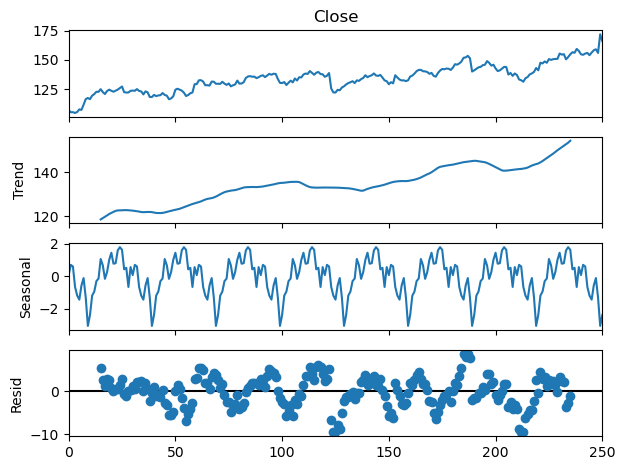

In [14]:
# Decompose the data to see trend, seasonality and noise
decompse= seasonal_decompose((df['Close']), model= 'additive', period= 30)
decompse.plot()

# Differencing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize' : (9,7), 'figure.dpi': 120})

**Identifying Trends**:
When handling time series data, it’s essential to recognize trends. Here’s what to look for:
- Uptrend: If the time series analysis shows a general pattern of increasing values over time, it’s considered an uptrend.
- Downtrend: Conversely, if the pattern indicates decreasing values, it’s a downtrend.
- Horizontal or Stationary Trend: When no clear pattern is observed (values remain relatively constant), it’s called a horizontal or stationary trend.

**Seasonal Patterns**:
- Look for repeating patterns that occur at fixed intervals (e.g., daily, weekly, monthly, or yearly).
- These patterns represent seasonality and can significantly impact your time series analysis.
- Identify any regular cycles or fluctuations within the data.

**Residuals**:
- Randomness and Independence:
  - Residuals should appear random and independent over time.
  - Look for a high density of points close to the origin (zero) and a low density of points away from the origin.
  - If the residuals exhibit any systematic patterns (e.g., increasing or decreasing trends), it suggests that the model has not captured all relevant information.
- Symmetry:
  - A good residual plot is symmetric about the origin (zero).
  - If the residuals are skewed or asymmetric, it indicates potential model deficiencies.

**Intrepretation**: This shows that our data has upwards trend and it is seasonal.

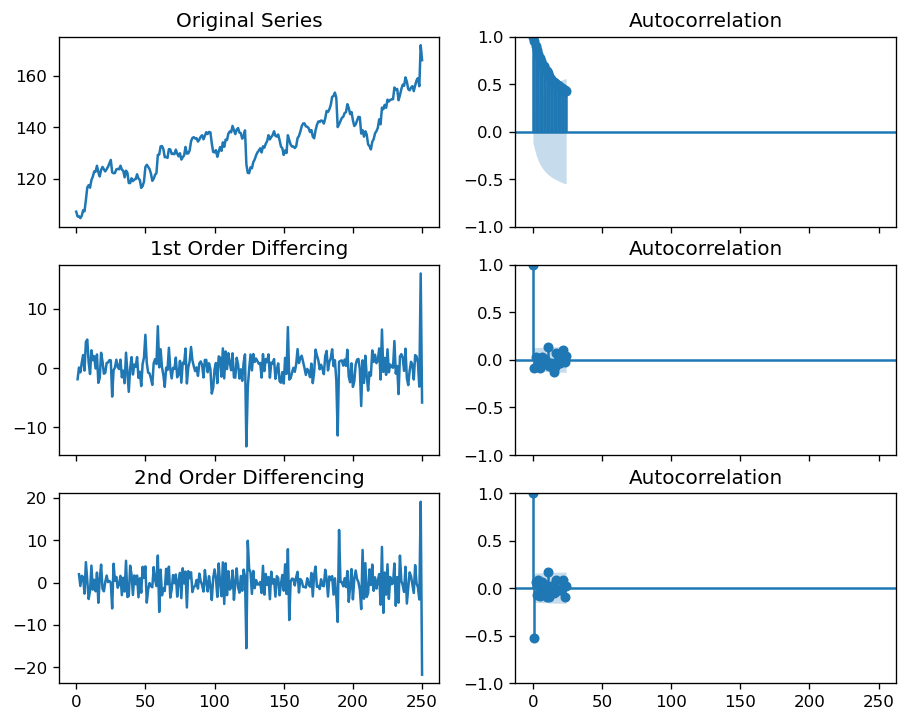

In [15]:
# Original Series
fig, axes= plt.subplots(3,2, sharex= True)
axes[0,0].plot(df.Close); axes[0,0].set_title('Original Series')
plot_acf(df.Close, ax=axes[0,1])
# 1st differcing
axes[1,0].plot(df.Close.diff()); axes[1,0].set_title('1st Order Differcing')
plot_acf(df.Close.diff().dropna(), ax=axes[1,1])
# 2nd differencing
axes[2,0].plot(df.Close.diff().diff()); axes[2,0].set_title('2nd Order Differencing')
plot_acf(df.Close.diff().diff().dropna(), ax=axes[2,1])
plt.show()

##### So we can take d=1

### Lets find p value

           0
0   1.000000
1   0.951008
2   0.898577
3   0.859037
4   0.818406
5   0.778221
6   0.745462
7   0.715611
8   0.685745
9   0.661838
10  0.638836
11  0.615438
12  0.585390
13  0.557590
14  0.535831
15  0.516757
16  0.506892
17  0.500235
18  0.490626
19  0.478938
20  0.469842
21  0.460229
22  0.451779
23  0.438783


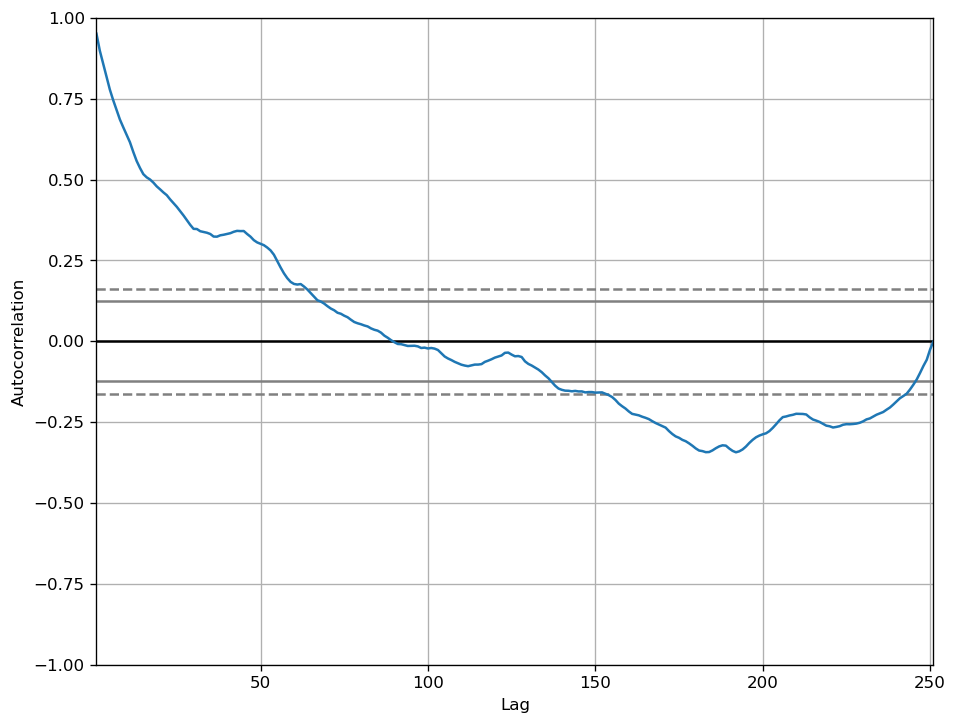

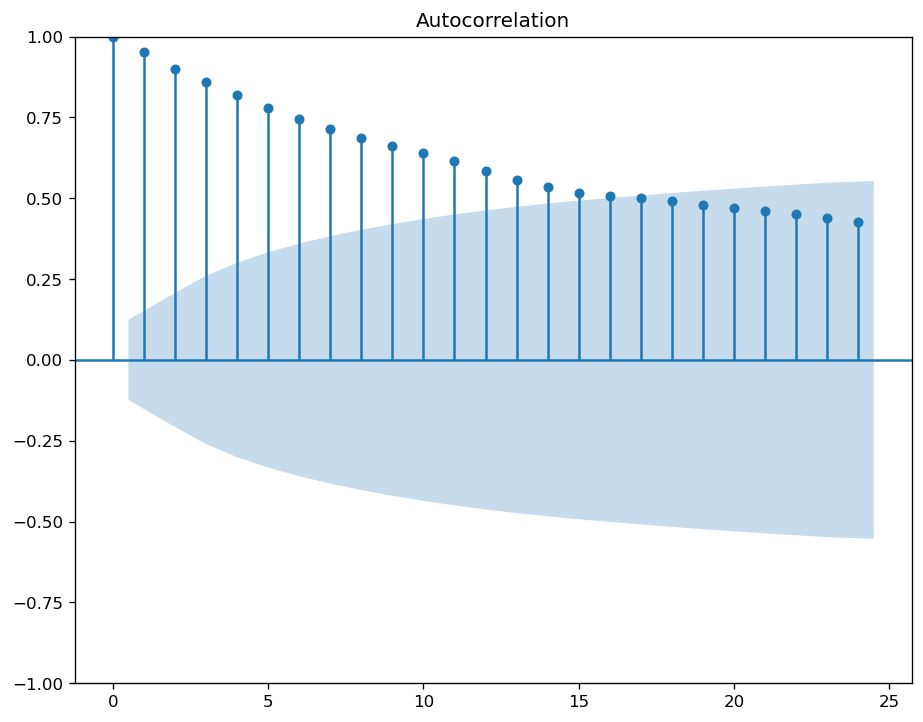

In [16]:
# plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.plotting.autocorrelation_plot(df['Close'])
plot_acf(df['Close'], alpha= 0.05) # 0.05 shows we have 5% chances of error

from statsmodels.tsa.stattools import acf, pacf
x_acf= pd.DataFrame(acf(df['Close']))
print(x_acf)

1. **Autocorrelation Function (ACF)**
  - The ACF plot shows the correlation of a time series with itself at different lags.
  - Each bar in the ACF plot represents the size and direction of the correlation between the current observation and observations at specific lags.
  - Significance of Bars:
    - Bars that extend across a red line are statistically significant.
    - Significant correlations at specific lags indicate patterns in the data.
  - Interpretation:
    - Randomness (White Noise): For random data, autocorrelations should be near zero for all lags. Analysts refer to this condition as white noise.
    - Non-Random Data: If at least one lag has a significant correlation, it suggests that the data are non-random.

2. **Partial Autocorrelation Function (PACF):**
  - The PACF plot shows the correlation of a time series with itself at different lags, after removing the effects of the previous lags.
  - It focuses on the direct impact of a specific lag on the current observation.
  - Interpretation:
    - Significant spikes in the PACF plot indicate the direct influence of past values at specific lags.
    - The gradual decline in PACF values beyond initial lags suggests less direct influence.

### after 3 values the lag is lower is than 95% so we can take value of p=3

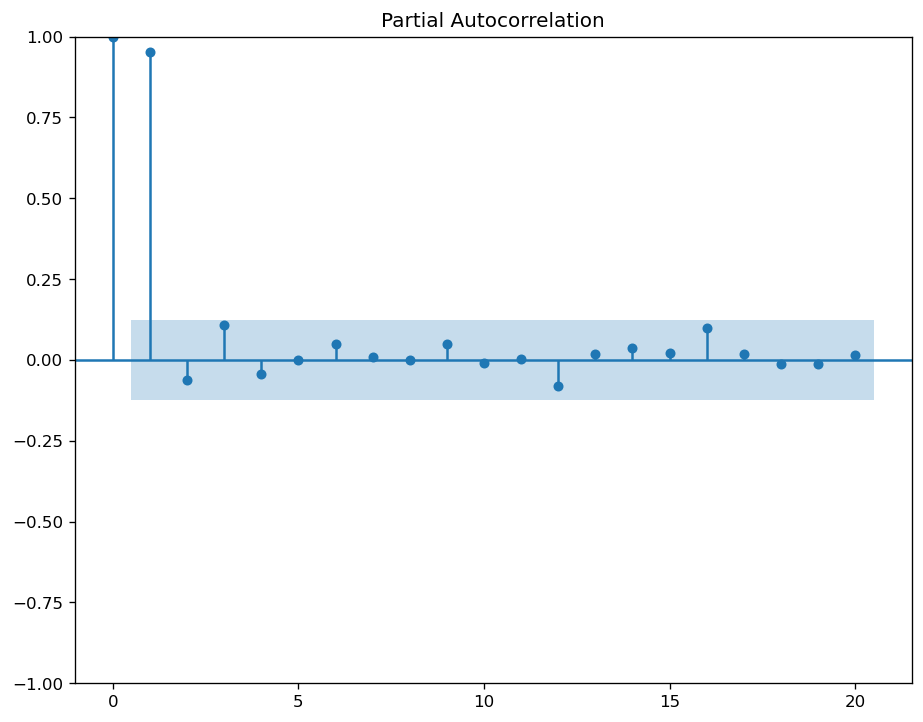

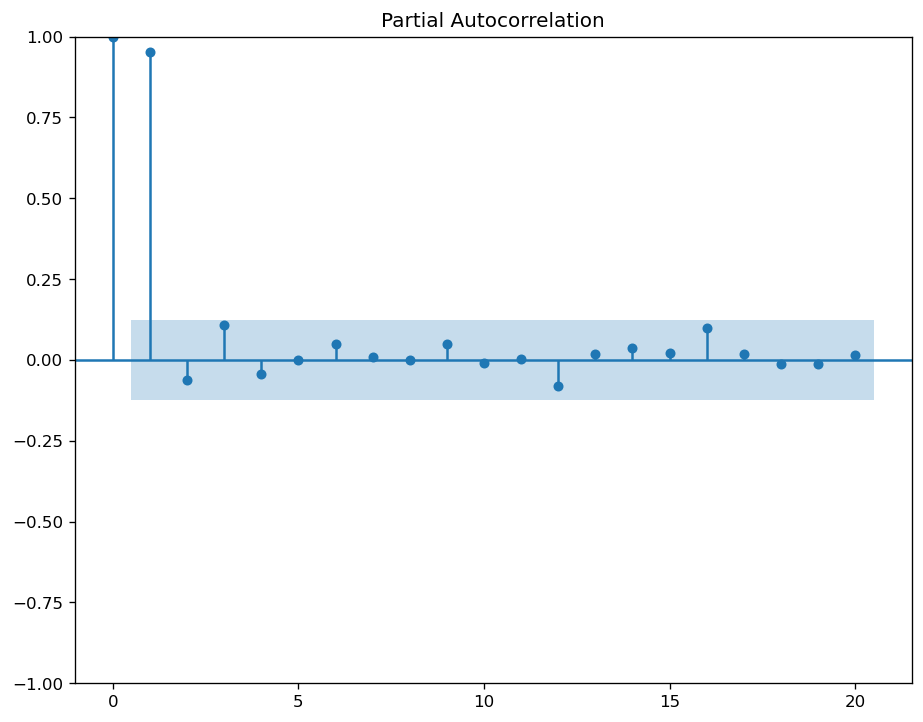

In [17]:
### Lets find q value

# partial autocorrelation
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df['Close'], lags= 20, alpha= 0.05)

##### So we can take q= 2

In [18]:
# Lets define p,d,q
p=3
d=1
q=2

In [19]:
!pip install pmdarima

In [20]:
# Lets run ARIMA with pmdarima
from pmdarima.arima import auto_arima

model= auto_arima(df['Close'], start_p= 1, start_q= 1, max_p=3, max_q= 2, n= 12, start_P= 0, seasonal= True, d=1, D=1, trace= True, error_action= 'ignore', suppress_warnings= True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1175.034, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1174.031, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1174.196, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1174.307, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1174.224, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.925 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -585.016
Date:                Tue, 30 Apr 2024   AIC                           1174.031
Time:                        17:51:47   BIC                           1181.074
Sample:                             0   HQIC                          1176.866
                                - 251                                       

In [21]:
# Other way
model= auto_arima(df['Close'], seasonal= True, suppress_warnings= True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -585.016
Date:                Tue, 30 Apr 2024   AIC                           1174.031
Time:                        17:51:50   BIC                           1181.074
Sample:                             0   HQIC                          1176.866
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2358      0.159      1.484      0.138      -0.076       0.547
sigma2         6.3107      0.231     27.271      0.000       5.857       6.764
Ljung-Box (L1) (Q):                   1.81   Jarque-

In [22]:
# stats model and arima
from statsmodels.tsa.arima.model import ARIMA
p,d,q= 3,1,2

model= ARIMA(df['Close'], order=[p,d,q])
model= model.fit()
print(model.summary())

C:\Users\pcmda\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\pcmda\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -584.273
Date:                Tue, 30 Apr 2024   AIC                           1180.545
Time:                        17:51:50   BIC                           1201.674
Sample:                             0   HQIC                          1189.049
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3138      0.711      0.442      0.659      -1.079       1.706
ar.L2          0.5476      0.698      0.785      0.432      -0.820       1.915
ar.L3         -0.0581      0.123     -0.472      0.6

From summary we can see that we got errors in it which shows that ARIMA can not be applied on seasonal data.

In [23]:
# Prediction from ARIMA model
# Predict next 30 days.
forecast= model.predict(n_periods=30)
print(forecast)

0        0.000000
1      107.199942
2      105.470402
3      105.291337
4      104.881925
          ...    
246    155.923002
247    158.270169
248    158.928482
249    156.108342
250    170.436478
Name: predicted_mean, Length: 251, dtype: float64


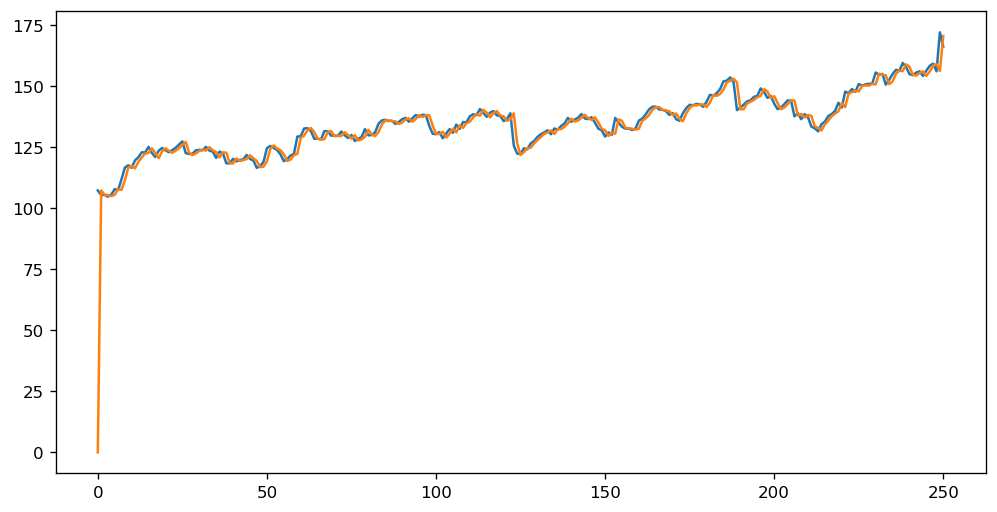

In [24]:
# Plotting forecast
plt.figure(figsize=(10,5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

In [25]:
# Prediction from ARIMA model
# Predict next 30 days.
forecast= model.predict(len(df['Close']), len(df['Close']+30))
print(forecast)

251    167.456277
dtype: float64


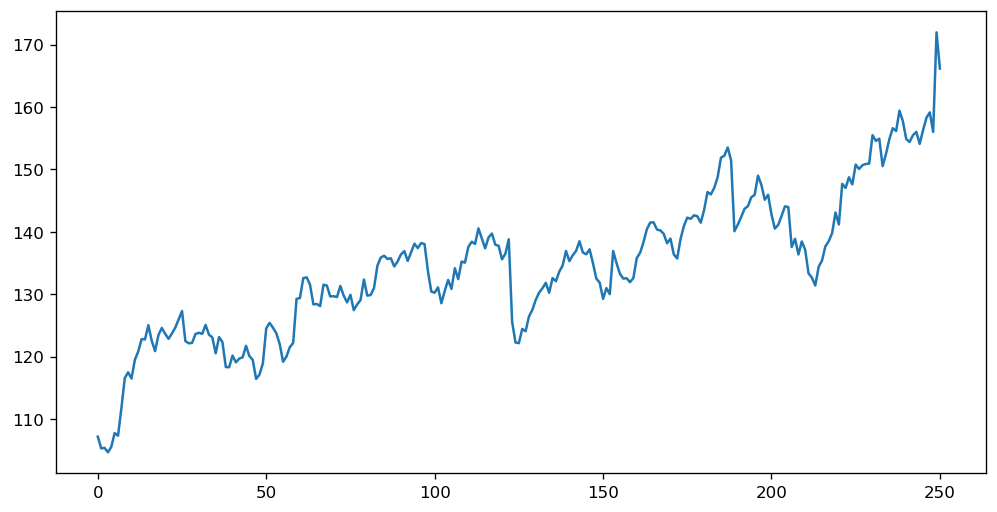

In [26]:
# Plotting forecast
plt.figure(figsize=(10,5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

Results are not satisfactory as ARIMA can't be applied on seasonal data.

In [27]:
# Applying SARIMA

import statsmodels.api as sm
import warnings

p,d,q= 3,1,2
model= sm.tsa.statespace.SARIMAX(df['Close'],
                                 order=(p,d,q),
                                 seasonal_order=(p,d,q,12))
model= model.fit()
print(model.summary())


C:\Users\pcmda\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\pcmda\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\pcmda\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -571.110
Date:                            Tue, 30 Apr 2024   AIC                           1164.221
Time:                                    17:52:17   BIC                           1202.416
Sample:                                         0   HQIC                          1179.614
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2453      1.343      0.183      0.855      -2.387       2.878
ar.L2          0.6581      1.180   

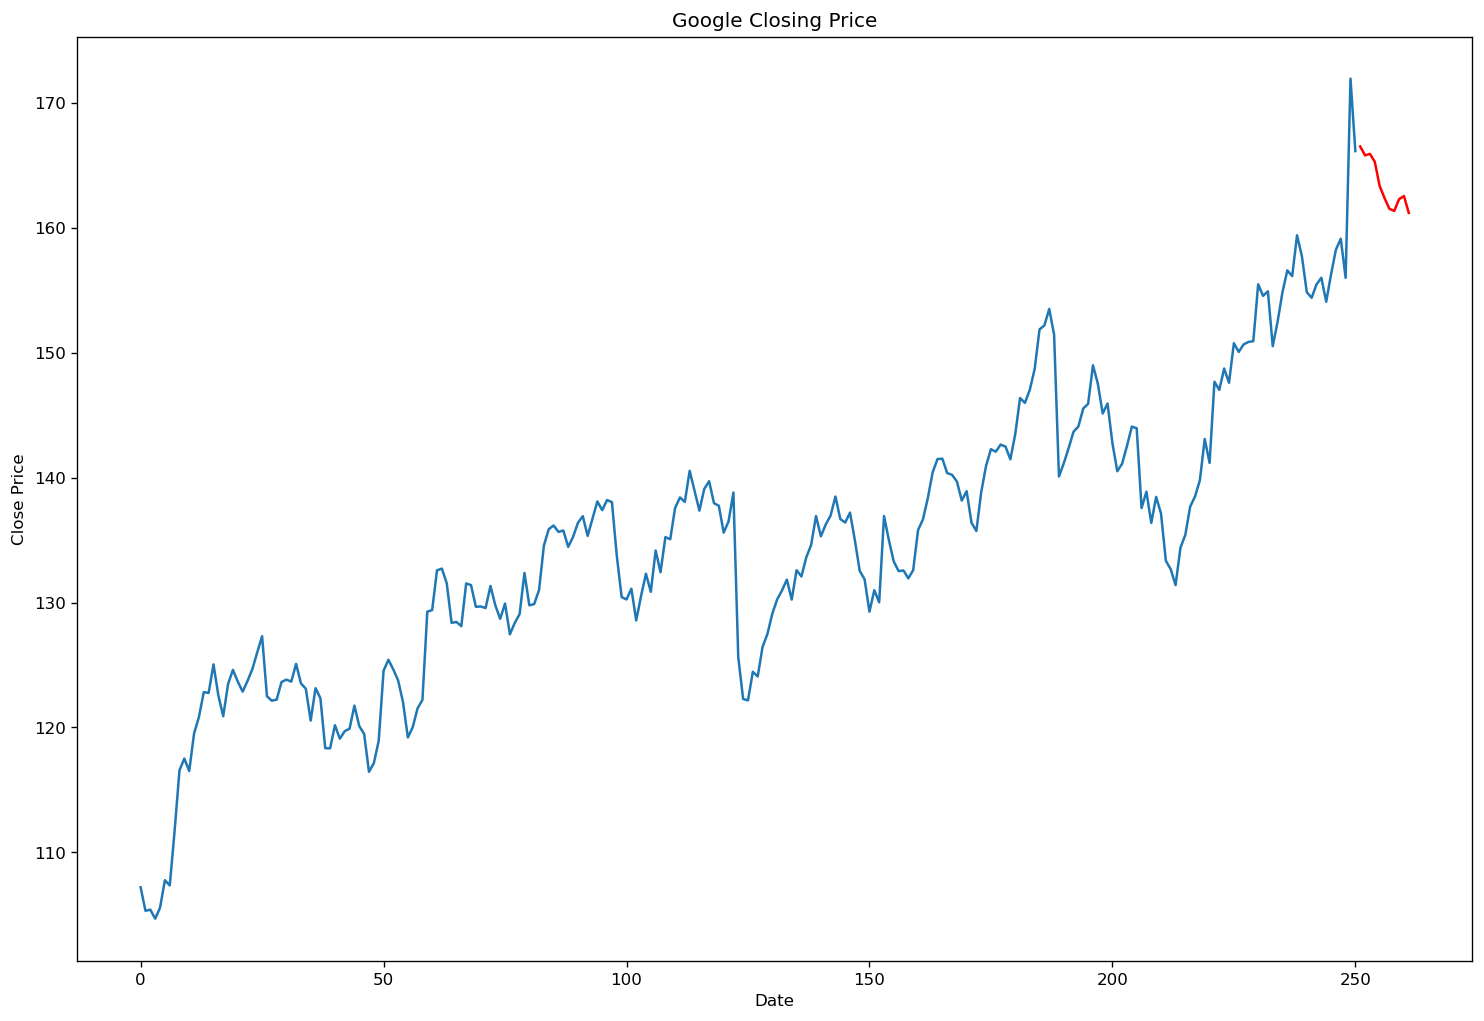

In [28]:

# Prediction
predictions= model.predict(start= len(df['Close']), end= len(df['Close'])+10)

# Plotting predictions
plt.figure(figsize=(15,10))
plt.plot(df['Close'], label= 'Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google Closing Price')
plt.show()

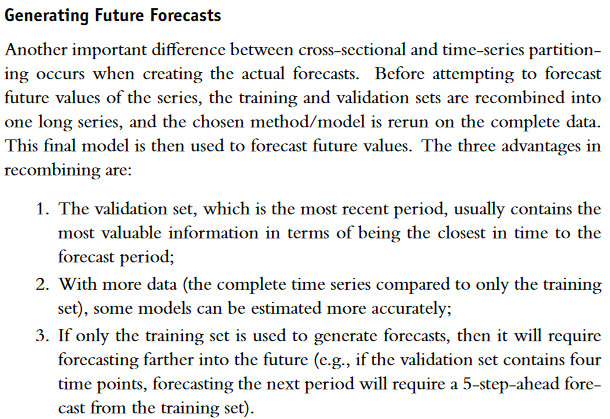

In [29]:
from warnings import filterwarnings
filterwarnings('ignore')
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
import statsmodels.api as sm
from datetime import date, timedelta

ticker = 'GOOGL'
# Define the dates to fetch data
today = date.today()  # Today's date
d1 = today.strftime('%Y-%m-%d')  # Defining the time format
end_date = d1  # Today's date is our last date
d2 = date.today() - timedelta(days=365)  # Last 1 year
d2 = d2.strftime('%Y-%m-%d')
start_date = d2  # Start date
print(f'Data start date is: {start_date} and end date is: {end_date}.')

NVDA = yf.download(ticker,
                   start=start_date,
                   end=end_date,
                   progress=False)['Close']

from math import ceil
first_third = ceil(len(NVDA) * (1 / 3))
mid_third = ceil(len(NVDA) * (2 / 3))
last_third = len(NVDA) - ceil(len(NVDA) * (2 / 3))
OG_NVDA = NVDA
NVDA_train = NVDA.iloc[:first_third]
valNVDA = OG_NVDA.iloc[first_third:mid_third]
futNVDA = OG_NVDA.iloc[mid_third:]

# Partition the data
train_ts = NVDA_train.values
nValid = len(valNVDA)
nTrain = len(NVDA_train)

Data start date is: 2023-05-01 and end date is: 2024-04-30.


In [30]:
# Combine training and validation sets
combined_train_val = np.concatenate([NVDA_train.values, valNVDA.values])

# SARIMA Model fitting
p, d, q = 3, 1, 2
model = sm.tsa.statespace.SARIMAX(combined_train_val,
                                  order=(p, d, q),
                                  seasonal_order=(p, d, q, 12))
model = model.fit()

# Forecasting future values
fut_start_index = len(combined_train_val)
fut_end_index = fut_start_index + len(futNVDA) - 1
fut_predictions = model.predict(start=fut_start_index, end=fut_end_index)

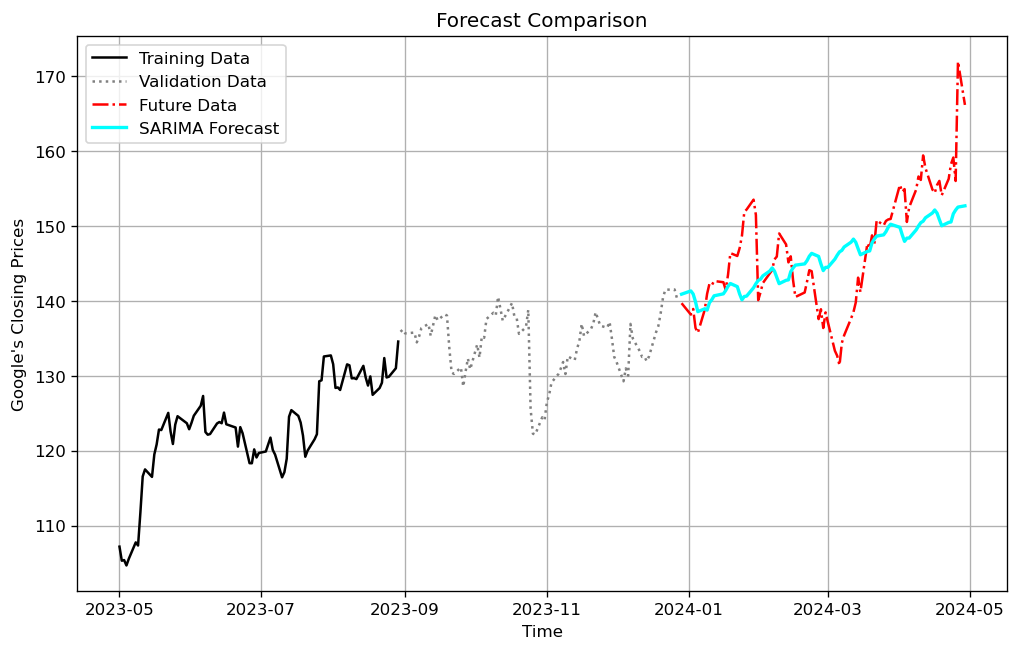

In [31]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(NVDA_train.index, NVDA_train, label='Training Data', color='black')
plt.plot(valNVDA.index, valNVDA, label='Validation Data', linestyle=':', color='grey')
plt.plot(futNVDA.index, futNVDA, label='Future Data', linestyle='-.', color='red')
plt.plot(futNVDA.index, fut_predictions, label='SARIMA Forecast', linestyle='-', color='cyan', linewidth=2)

plt.xlabel('Time')
plt.ylabel("Google's Closing Prices")
plt.title('Forecast Comparison')
plt.legend()
plt.grid(True)
plt.show()

**References**

Time series analysis: Definition, types, techniques, and when it’s used. Tableau. (n.d.). https://www.tableau.com/learn/articles/time-series-analysis#definition
